### Hydgrogen LDA with Plotted Potentials

In [1]:
import numpy as np
from CADMium import Psgrid
from CADMium import Kohnsham

#Distance of the nucley from grid center
a =  1.0

#Nuclear charges on centers AB
Za  = 1
Zb = 0

#Set polaization. 1 Unpolarized, 2 Polarized
pol = 1

Nmo = [[1]]
N   = [[1]]

optKS = {
        "interaction_type" : "dft",
        "SYM" : False,
        "FRACTIONAL" : True,
        }

#Grid Options
NP = 7 #Number of points per block
NM =  [4,4] #Number of blocks [angular, radial]
L = np.arccosh(15./a) #Maximum radial coordinate value
loc = np.array(range(-4,5)) #Non inclusive on upper bound

#Create and initialize grid object
grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

#Kohn Sham object
KS = Kohnsham(grid, Za, Zb, pol, Nmo, N, optKS)
KS.scf()

print(f" Total Energy: {KS.E.E}")

 iter    Total Energy     HOMO Eigenvalue         Res       

----------------------------------------------------------- 

    1       -0.48889      -2.11156e-01       +1.00000e+00
    2       -0.46283      -2.24647e-01       +5.63131e-02
    3       -0.45241      -2.29956e-01       +2.30263e-02
    4       -0.44831      -2.32059e-01       +9.15620e-03
    5       -0.44670      -2.32896e-01       +3.60898e-03
    6       -0.44607      -2.33231e-01       +1.41144e-03
    7       -0.44582      -2.33365e-01       +5.50624e-04
    8       -0.44573      -2.33419e-01       +2.13114e-04
    9       -0.44569      -2.33441e-01       +8.16976e-05
   10       -0.44567      -2.33450e-01       +3.09185e-05
   11       -0.44567      -2.33453e-01       +1.14897e-05
   12       -0.44567      -2.33455e-01       +4.15571e-06
 Total Energy: -0.4456678603283697


In [2]:
#Visualize components
import matplotlib.pyplot as plt

vext,x,y = grid.plotter(KS.vext)
vh,_,_ = grid.plotter(KS.V.vh)
vxc,_,_ = grid.plotter(KS.V.vx + KS.V.vc)

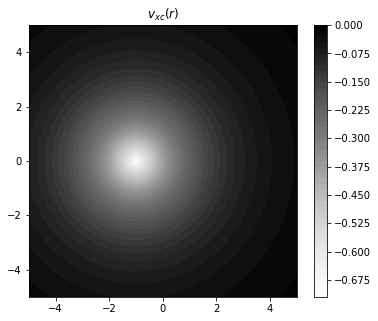

In [3]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=50,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

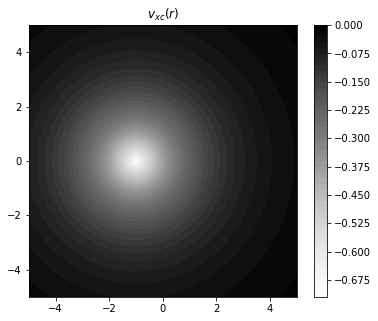

In [4]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{xc}(r)$")

plt.contourf(x,y,vxc, 
             levels=50,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

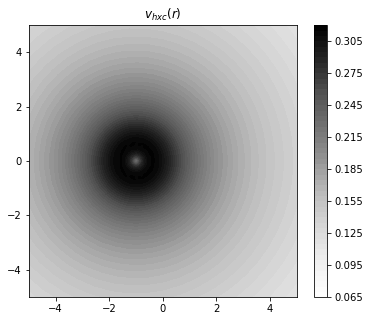

In [5]:
fig = plt.figure(figsize=(6,5))

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.title("$v_{hxc}(r)$")

plt.contourf(x,y,vxc + vh, 
             levels=50,
             cmap="Greys",
             antialiased = False,
             linestyles = "dotted",
            )

plt.colorbar()
plt.show()

In [6]:
#Extract components along the z axis
x, v_hartree = grid.axis_plot(KS.V.vh)
_, v_xc      = grid.axis_plot(KS.V.vx + KS.V.vc)

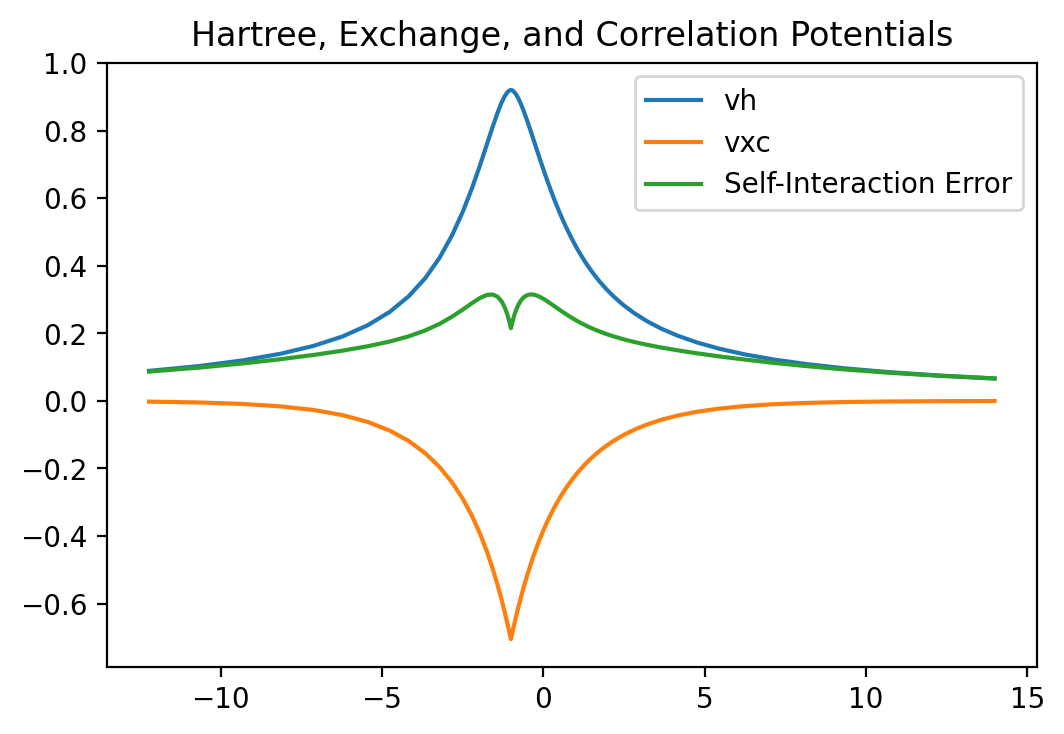

In [7]:
fig = plt.figure(dpi=200)

plt.title("Hartree, Exchange, and Correlation Potentials") 

plt.plot(x, v_hartree, label="vh")
plt.plot(x, v_xc, label="vxc")
plt.plot(x, v_hartree + v_xc, label="Self-Interaction Error")


plt.legend()
plt.show()